In [2]:
import pandas as pd #pandas as pd: Used for data manipulation and analysis (especially for working with CSVs, DataFrames).
import matplotlib.pyplot as plt #matplotlib.pyplot as plt: Used for plotting graphs and charts.
import numpy as np #numpy as np: Useful for numerical operations and array handling.
import seaborn as sns #seaborn as sns: A statistical data visualization library built on top of matplotlib.
from sklearn.utils import resample #Used to resample datasets
import scipy.stats as stats #Imports statistical functions like: stats.zscore() for outlier detection
from sklearn.model_selection import train_test_split #Splits your dataset into training and testing sets.
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix
"""
accuracy_score – overall correctness
f1_score – balance between precision & recall
precision_score – true positives / predicted positives =TP/TP+FP
recall_score – true positives / actual positives =TP/TP+FN
classification_report – nicely formatted output of multiple metrics
confusion_matrix – confusion matrix table (TP, FP, FN, TN)
"""
from sklearn import metrics #Generic access to all metrics, like metrics.mean_squared_error, etc.
import math #Built-in Python module for mathematical functions, e.g., math.sqrt(), math.log(), math.exp(), etc.
from sklearn.model_selection import cross_val_score, cross_val_predict #cross_val_score():Runs cross-validation and returns model performance scores.cross_val_predict(): Returns the predicted values during cross-validation.
from sklearn.tree import DecisionTreeRegressor #A decision tree used for predicting continuous values (regression task).
from sklearn.ensemble import RandomForestRegressor #Uses an ensemble of decision trees to improve regression accuracy and reduce overfitting.
from sklearn.ensemble import AdaBoostRegressor #Boosting model for regression tasks, where multiple weak regressors are combined iteratively.
from sklearn.tree import DecisionTreeClassifier #Builds a single decision tree model — interpretable, but can overfit if not pruned.
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors classifier. Simple, intuitive model based on closeness of data points.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier 
#Ensemble of decision trees for robust classification. Great at handling both classification and regression.
#Boosting method that combines multiple weak learners (usually decision stumps) to form a strong classifier.
from sklearn.linear_model import LogisticRegression #Logistic regression model for binary or multi-class classification. Simple, fast, and interpretable.
sns.set_theme(color_codes=True) #sns.set_theme(color_codes=True): Sets the visual theme for seaborn plots with color code support enabled.

In [3]:
df= pd.read_csv('dataset_phishing.csv')
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


<Axes: xlabel='domain_with_copyright', ylabel='count'>

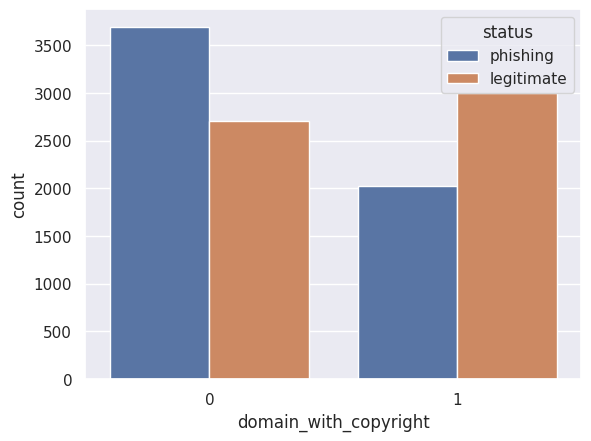

In [4]:
sns.countplot(data=df,x='domain_with_copyright',hue='status')

<Axes: xlabel='page_rank', ylabel='Count'>

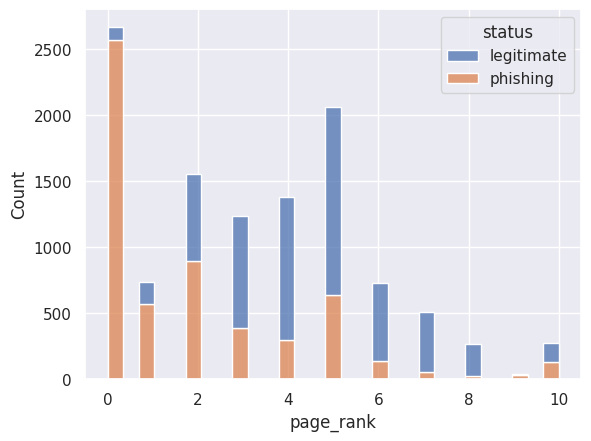

In [5]:
sns.histplot(data=df,x='page_rank',hue='status',multiple='stack') 

In [10]:
for col in ["url","length_url","length_hostname","ip","nb_dots","nb_hyphens","nb_at","nb_qm","nb_and","nb_or","nb_eq","nb_underscore","nb_tilde","nb_percent","nb_slash","nb_star","nb_colon","nb_comma","nb_semicolumn","nb_dollar","nb_space","nb_www","nb_com","nb_dslash","http_in_path","https_token","ratio_digits_url","ratio_digits_host","punycode","port","tld_in_path","tld_in_subdomain","abnormal_subdomain","nb_subdomains","prefix_suffix","random_domain","shortening_service","path_extension","nb_redirection","nb_external_redirection","length_words_raw","char_repeat","shortest_words_raw","shortest_word_host","shortest_word_path","longest_words_raw","longest_word_host","longest_word_path","avg_words_raw","avg_word_host","avg_word_path","phish_hints","domain_in_brand","brand_in_subdomain","brand_in_path","suspecious_tld","statistical_report","nb_hyperlinks","ratio_intHyperlinks","ratio_extHyperlinks","ratio_nullHyperlinks","nb_extCSS","ratio_intRedirection","ratio_extRedirection","ratio_intErrors","ratio_extErrors","login_form","external_favicon","links_in_tags","submit_email","ratio_intMedia","ratio_extMedia","sfh","iframe","popup_window","safe_anchor","onmouseover","right_clic","empty_title","domain_in_title","domain_with_copyright","whois_registered_domain","domain_registration_length","domain_age","web_traffic","dns_record","google_index","page_rank","status"]:
    unique_vals = list(df[col].unique())
    for idx in range(len(unique_vals)):
        df[col]=df[col].replace([unique_vals[idx]],idx) #remember to put [uni..[],idx]
df.shape

(11430, 89)

In [11]:
df.dtypes

url                int64
length_url         int64
length_hostname    int64
ip                 int64
nb_dots            int64
                   ...  
web_traffic        int64
dns_record         int64
google_index       int64
page_rank          int64
status             int64
Length: 89, dtype: object

In [12]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64